In [1]:
import os
import copy

import pandas as pd
from ete3 import Tree

In [2]:
import math
import random
import lightgbm as lgb
import os
import pickle
import optuna
import numpy as np
import pandas as pd
from statistics import mean
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import GroupKFold

In [3]:
file_dir = "/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2"
dir_list = os.listdir(file_dir)
dir_list.sort(key=lambda item: (len(item), item))
for data_dir in dir_list:
    print(data_dir)

362_1
378_3
563_0
591_0
610_1
639_0
643_0
643_1
645_2
650_0
650_2
684_1
688_1
697_0
2178_1
2180_2
2181_0
2191_2
2196_0
2197_0
2209_0
2217_0
2220_0
2224_0
2225_0
2230_0
2233_0
2234_0
2234_3
2239_3
2241_1
2248_0
2250_0
2251_6
2254_0
2256_1
2374_0
9931_1
9934_0
9936_1
9937_1
9948_1
9948_2
9950_0
9950_1
9952_0
9972_0
9973_0
9987_1
9988_0
9991_3
9996_1
9999_0
10006_1
10009_2
10011_1
10015_0
10020_2
10028_1
10031_1
10033_0
10033_1
10038_0
10052_0
10053_0
10054_0
10058_1
10060_0
10062_0
10064_0
10067_0
10070_0
10072_0
10072_4
10078_0
10082_0
10096_3
10097_2
10098_1
10100_0
10100_1
10101_0
10104_0
10104_4
10115_3
10117_0
10118_0
10130_0
10133_1
10133_2
10136_0
10138_0
10142_1
10151_1
10152_0
10152_1
10154_0
10158_1
10166_0
10168_0
10168_1
10168_2
10169_0
10169_2
10195_0
10196_0
10197_1
10199_0
10199_1
10199_2
10199_3
10212_1
10214_0
10226_1
10233_3
10238_0
10240_2
10248_0
10256_1
10264_0
10267_4
10268_3
10270_1
10270_2
10270_3
10270_4
10270_6
10271_5
10273_3
10283_0
10286_0
10286_3
10288_0
102

In [4]:
len(dir_list)

1440

In [5]:

# iqtree_path = "/home/piyumal/Tools/iqtree/split_support/iqtree2"
# counter = 1
# for data_dir in dir_list:
#     print(
#         "###########################################################################################################################################")
#     print(
#         "###########################################################################################################################################")
#     print(
#         "###########################################################################################################################################")
#     print(counter)
    # print("Running IQ-TREE for:", data_dir)
    # seq_file = file_dir + "/" + data_dir + "/" + data_dir + "_msa.fasta"
    # prefix = file_dir + "/" + data_dir + "/" + data_dir
    # tree_file = file_dir + "/" + data_dir + "/" + data_dir + ".newick"
    # boostrap_tree_file = file_dir + "/" + data_dir + "/" + data_dir + ".splits.nex"
    # iqtree_cmd = f"{iqtree_path} -sup {tree_file} -t {boostrap_tree_file} --prefix {prefix}"
    # os.system(iqtree_cmd)
    # 
    # print("Completed IQ-TREE for:", data_dir)
    # 
    # # print(seq_file)
    # # print(prefix)
    # # print(tree_file)
    # counter += 1
    # print(
    #     "###########################################################################################################################################")
    # print(
    #     "###########################################################################################################################################")
    # print(
    #     "###########################################################################################################################################")
# print(counter)

In [6]:
import os.path
counter = 0
for data_dir in dir_list:
    file_path = boostrap_tree_file = file_dir+ "/"+ data_dir + "/" + data_dir  + ".splits.nex"
    if not os.path.exists(file_path):
        print(file_path)
        counter += 1
        print(counter)

/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/639_0/639_0.splits.nex
1
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/643_0/643_0.splits.nex
2
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/650_0/650_0.splits.nex
3
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/650_2/650_2.splits.nex
4
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/2250_0/2250_0.splits.nex
5
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/9931_1/9931_1.splits.nex
6
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/9937_1/9937_1.splits.nex
7
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/9948_1/9948_1.splits.nex
8
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/9987_1/9987_1.splits.nex
9
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/9988_0/9988_0.splits.nex
10
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/10028_1/10028_1.splits.nex
11
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/10031_1/10031_1.splits.nex
12
/home/piyumal/PHD

In [7]:
# import os.path
# mpboot_path = "/home/piyumal/Tools/mpboot/mpboot"
# counter = 1
# for data_dir in dir_list:
#     file_path = boostrap_tree_file = file_dir+ "/"+ data_dir + "/" + data_dir  + ".splits.nex"
#     if not os.path.exists(file_path):
#         print("###########################################################################################################################################")
#         print("###########################################################################################################################################")
#         print("###########################################################################################################################################")
#         print(counter)
#         print("Running MPBOOT for:", data_dir)
#         seq_file = file_dir + "/" + data_dir + "/" + data_dir + "_msa.fasta"
#         prefix = file_dir + "/" + data_dir + "/" + data_dir
#         tree_file = file_dir + "/" + data_dir + "/" + data_dir + ".newick"
#         # boostrap_tree_file = file_dir+ "/"+ data_dir + "/" + data_dir  + ".splits.nex"
#         mpboot_cmd = f"{mpboot_path} -s {seq_file} -bb 1000 {tree_file} -pre {prefix}"
#     
#         os.system(mpboot_cmd)
#         # os.system(iqtree_cmd)
#         print("Completed MPBOOT for:", data_dir)
#     
#         # print(seq_file)
#         # print(prefix)
#         # print(tree_file)
#         counter += 1
#         print("###########################################################################################################################################")
#         print("###########################################################################################################################################")
#         print("###########################################################################################################################################")
# print(counter)

In [8]:
import os.path
counter = 0
generated_data_dir = []
for data_dir in dir_list:
    file_path = boostrap_tree_file = file_dir+ "/"+ data_dir + "/" + data_dir  + ".splits.nex"
    if os.path.exists(file_path):
        print(file_path)
        counter += 1
        print(counter)
        generated_data_dir.append(data_dir)

/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/362_1/362_1.splits.nex
1
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/378_3/378_3.splits.nex
2
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/563_0/563_0.splits.nex
3
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/591_0/591_0.splits.nex
4
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/610_1/610_1.splits.nex
5
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/643_1/643_1.splits.nex
6
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/645_2/645_2.splits.nex
7
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/684_1/684_1.splits.nex
8
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/688_1/688_1.splits.nex
9
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/697_0/697_0.splits.nex
10
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/2178_1/2178_1.splits.nex
11
/home/piyumal/PHD/phylogenetics/bootstrap_support/raw2/2180_2/2180_2.splits.nex
12
/home/piyumal/PHD/phylogenetics/b

In [9]:
generated_data_dir

['362_1',
 '378_3',
 '563_0',
 '591_0',
 '610_1',
 '643_1',
 '645_2',
 '684_1',
 '688_1',
 '697_0',
 '2178_1',
 '2180_2',
 '2181_0',
 '2191_2',
 '2196_0',
 '2197_0',
 '2209_0',
 '2217_0',
 '2220_0',
 '2224_0',
 '2225_0',
 '2230_0',
 '2233_0',
 '2234_0',
 '2234_3',
 '2239_3',
 '2241_1',
 '2248_0',
 '2251_6',
 '2254_0',
 '2256_1',
 '2374_0',
 '9934_0',
 '9936_1',
 '9948_2',
 '9950_0',
 '9950_1',
 '9952_0',
 '9972_0',
 '9973_0',
 '9991_3',
 '9996_1',
 '9999_0',
 '10006_1',
 '10009_2',
 '10011_1',
 '10015_0',
 '10020_2',
 '10033_0',
 '10033_1',
 '10053_0',
 '10054_0',
 '10058_1',
 '10060_0',
 '10062_0',
 '10064_0',
 '10070_0',
 '10072_0',
 '10072_4',
 '10078_0',
 '10082_0',
 '10096_3',
 '10097_2',
 '10098_1',
 '10101_0',
 '10104_0',
 '10104_4',
 '10115_3',
 '10117_0',
 '10118_0',
 '10130_0',
 '10133_1',
 '10136_0',
 '10138_0',
 '10142_1',
 '10151_1',
 '10152_0',
 '10152_1',
 '10154_0',
 '10158_1',
 '10168_0',
 '10168_1',
 '10168_2',
 '10169_0',
 '10169_2',
 '10195_0',
 '10196_0',
 '10197_1

In [10]:
def generate_tree_str(file_path, data_dir):
    index = 0
    tree_data = []
    tree_file_dir = file_path + "/"+ data_dir + "/"+ data_dir + ".suptree"
    tree_file_dir_ete3 = file_path + "/"+ data_dir + "/"+ data_dir + ".suptree.ete3"
    tree_str_data = open(tree_file_dir, "r")
    tree_str1 = tree_str_data.read()
    tree_str_data.close()
    while index<len(tree_str1):
        local_bs = []
        tree_data.append(tree_str1[index])
        if tree_str1[index]== ")" and tree_str1[index+1]!=";":
            local_index = index+1
            while tree_str1[local_index]!= ":":
                local_bs.append(tree_str1[local_index])
                local_index +=1
            index = local_index
            local_index = local_bs.index("/")
            a = local_bs[:local_index]
            b = local_bs[local_index+1:]
            n1 = "".join(a)
            n2 = "".join(b)
            n1 = int(n1)
            n2 = int(n2)
            mpboot_support = n2/100.0
            tree_data.append(str(mpboot_support))
            tree_data.append(":")
            # print(local_bs)
            
        index +=1
    # print(tree_data)
    tree_revised = "".join(tree_data)
    
    f = open(tree_file_dir_ete3, "w")
    f.write(tree_revised)
    f.close()
    

In [11]:
# counter = 0
# for dir_str in generated_data_dir:
#     print("########################################")
#     print(dir_str)
#     generate_tree_str(file_dir, dir_str)
#     counter +=1
#     print(counter)
    

In [12]:
# branch_id_list = []
# dataset_id_list = []
# support_values = []
# for dir_str in generated_data_dir:
#     print("##########################")
#     print(dir_str)
#     tree_file_dir_ete3 = file_dir + "/"+ dir_str + "/"+ dir_str + ".suptree.ete3"
#     with open(tree_file_dir_ete3, "r") as tree_file:
#         tree_data = tree_file.read()
#         tree = Tree(tree_data)
# 
#         branch_id = 0      
#         for node in tree.traverse():
#             branch_id +=1
#             if node.support is not None and not node.is_leaf():
#                 print(branch_id, ":" , node.support)
#                 support_values.append(node.support)
#                 branch_id_list.append(branch_id)
#                 dataset_id_list.append(dir_str)


In [13]:
# len(branch_id_list)

In [14]:
# len(dataset_id_list)

In [15]:
# len(support_values)

In [16]:
# a = set(dataset_id_list)

In [17]:
# len(a)

In [19]:
# mpboot_df = pd.DataFrame(data={'dataset_id':dataset_id_list, 'branch_id':branch_id_list, 'mpboot_value':support_values})
mpboot_df = pd.read_csv("/home/piyumal/PHD/phylogenetics/bootstrap_support/mpboot_data.csv")

In [20]:
mpboot_df

,dataset_id,branch_id,mpboot_value
0,362_1,1,1.00
1,362_1,2,1.00
2,362_1,3,0.99
3,362_1,4,0.84
4,362_1,5,0.99
...,...,...,...
79695,28360_31,117,0.18
79696,28360_31,119,0.93
79697,28360_31,120,0.22
79698,28360_31,124,0.21


In [21]:
# mpboot_df.to_csv('/home/piyumal/PHD/phylogenetics/bootstrap_support/'+'mpboot_data.csv', index=False)

In [26]:
final_data_df = pd.read_csv('/home/piyumal/PHD/phylogenetics/bootstrap_support/final.csv', usecols=lambda column: column != 'Unnamed: 0')

In [71]:
final_data_df.head()

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,min_pars_bootstrap_support_children_w,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,support
0,1,1.000000,1.000000,0.01,0.000000,8.226300,-1.000000,0.000000,0.000000,1.0,...,0.000000,8.226300,36.639799,0.53047,0.142857,0.005826,2.790572,3.41727,24992_0,0.01
1,2,0.973670,0.257669,0.06,0.000002,0.000012,0.000000,0.000002,0.000019,2.0,...,0.000000,0.000000,0.000000,0.53047,0.142857,0.005826,2.790572,3.41727,24992_0,0.03
2,7,0.026302,0.046723,1.00,0.000018,8.226300,0.000007,0.000910,0.008605,18.0,...,0.000013,8.226300,27.695487,0.53047,0.142857,0.005826,2.790572,3.41727,24992_0,0.84
3,11,0.019750,0.040789,1.00,0.000020,8.226300,0.030338,0.003710,0.035080,20.0,...,0.000013,8.226300,27.375639,0.53047,0.142857,0.005826,2.790572,3.41727,24992_0,0.99
4,12,0.933898,0.006184,0.18,0.000018,0.000100,0.030338,0.000001,0.000009,18.0,...,0.000016,0.000066,25.000000,0.53047,0.142857,0.005826,2.790572,3.41727,24992_0,0.57


In [72]:
generated_data_dir

['362_1',
 '378_3',
 '563_0',
 '591_0',
 '610_1',
 '643_1',
 '645_2',
 '684_1',
 '688_1',
 '697_0',
 '2178_1',
 '2180_2',
 '2181_0',
 '2191_2',
 '2196_0',
 '2197_0',
 '2209_0',
 '2217_0',
 '2220_0',
 '2224_0',
 '2225_0',
 '2230_0',
 '2233_0',
 '2234_0',
 '2234_3',
 '2239_3',
 '2241_1',
 '2248_0',
 '2251_6',
 '2254_0',
 '2256_1',
 '2374_0',
 '9934_0',
 '9936_1',
 '9948_2',
 '9950_0',
 '9950_1',
 '9952_0',
 '9972_0',
 '9973_0',
 '9991_3',
 '9996_1',
 '9999_0',
 '10006_1',
 '10009_2',
 '10011_1',
 '10015_0',
 '10020_2',
 '10033_0',
 '10033_1',
 '10053_0',
 '10054_0',
 '10058_1',
 '10060_0',
 '10062_0',
 '10064_0',
 '10070_0',
 '10072_0',
 '10072_4',
 '10078_0',
 '10082_0',
 '10096_3',
 '10097_2',
 '10098_1',
 '10101_0',
 '10104_0',
 '10104_4',
 '10115_3',
 '10117_0',
 '10118_0',
 '10130_0',
 '10133_1',
 '10136_0',
 '10138_0',
 '10142_1',
 '10151_1',
 '10152_0',
 '10152_1',
 '10154_0',
 '10158_1',
 '10168_0',
 '10168_1',
 '10168_2',
 '10169_0',
 '10169_2',
 '10195_0',
 '10196_0',
 '10197_1

In [75]:
mask = final_data_df['dataset'].isin(generated_data_dir)

In [76]:
mask

0        False
1        False
2        False
3        False
4        False
         ...  
85560     True
85561     True
85562     True
85563     True
85564     True
Name: dataset, Length: 85565, dtype: bool

In [77]:
final_data_df_2 = final_data_df[mask]

In [78]:
final_data_df_2

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,min_pars_bootstrap_support_children_w,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,support
14,1,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,...,0.000000,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.01
15,2,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,...,0.000021,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.68
16,3,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,...,2.718360,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.87
17,5,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,...,0.000021,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.75
18,9,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,...,0.000080,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,23,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,...,0.000000,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.02
85561,28,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,...,0.000000,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.11
85562,30,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,...,0.000000,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.75
85563,32,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,...,0.000000,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.31


In [79]:
# len(dataset_id_list)

In [82]:
final_data_df_2["mpboot_value"] = 0

/tmp/ipykernel_143510/179176510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_df_2["mpboot_value"] = 0


In [81]:
final_data_df_2

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,support,mpboot_value
14,1,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,...,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.01,0
15,2,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,...,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.68,0
16,3,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,...,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.87,0
17,5,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,...,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.75,0
18,9,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,...,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,23,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,...,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.02,0
85561,28,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,...,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.11,0
85562,30,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,...,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.75,0
85563,32,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,...,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.31,0


In [83]:
for index, row in mpboot_df.iterrows():
    condition = (final_data_df_2["branchId"] == row["branch_id"]) & (final_data_df_2["dataset"] == row["dataset_id"])
    final_data_df_2.loc[(final_data_df_2["branchId"] == row["branch_id"]) & (final_data_df_2["dataset"] == row["dataset_id"]), "mpboot_value"] = row["mpboot_value"]
   

/tmp/ipykernel_143510/3672853018.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.99' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_data_df_2.loc[(final_data_df_2["branchId"] == row["branch_id"]) & (final_data_df_2["dataset"] == row["dataset_id"]), "mpboot_value"] = row["mpboot_value"]


In [84]:
# merged_df = final_data_df_2.merge(mpboot_df, left_on=["branchId", "dataset"], right_on=["branch_id", "dataset_id"], how="left")
# final_data_df_2["mpboot_value"] = merged_df["mpboot_value_y"]


In [85]:
final_data_df_2

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,support,mpboot_value
14,1,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,...,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.01,1.00
15,2,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,...,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.68,0.04
16,3,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,...,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.87,0.89
17,5,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,...,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.75,0.30
18,9,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,...,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.73,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,23,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,...,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.02,0.07
85561,28,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,...,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.11,0.11
85562,30,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,...,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.75,0.84
85563,32,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,...,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.31,0.31


In [86]:
final_data_df_2.to_csv('/home/piyumal/PHD/phylogenetics/bootstrap_support/'+'final_mpboot_train_v2.csv', index=False)

In [87]:
def quantile_loss(y_true, y_pred, quantile):
    """
    Computes the quantile loss.

    Parameters
    ----------
    y_true : np.ndarray
        Ground truth values

    y_pred : np.ndarray
        Prediction values

    quantile : float in [0,1]
        Quantile, e.g. 0.5 for the median quantile
    """
    residual = y_true - y_pred
    return mean(np.maximum(quantile * residual, (quantile - 1) * residual))


def MBE(y_true, y_pred):
    """
    Computes Mean Bias Error (MBE)

    Parameters
    ----------
    y_true : np.ndarray
        Ground truth values

    y_pred : np.ndarray
        Prediction values
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true = y_true.reshape(len(y_true), 1)
    y_pred = y_pred.reshape(len(y_pred), 1)
    diff = (y_true - y_pred)
    mbe = diff.mean()
    return mbe

In [88]:
df = final_data_df_2.copy()

df.fillna(-1, inplace=True)
df.replace([np.inf, -np.inf], -1, inplace=True)

print("Median Support: ")
print(df["support"].median())
df.columns = df.columns.str.replace(':', '_')
df["group"] = df['dataset'].astype('category').cat.codes.tolist()

target = "support"
sample_dfs = random.sample(df["group"].unique().tolist(), int(len(df["group"].unique().tolist()) * 0.2))
test = df[df['group'].isin(sample_dfs)]
train = df[~df['group'].isin(sample_dfs)]

X_train = train.drop(axis=1, columns=target)
y_train = train[target]

X_test = test.drop(axis=1, columns=target)
y_test = test[target]

Median Support: 
0.6


In [89]:
mse_zero = mean_squared_error(y_test, np.zeros(len(y_test)))
rmse_zero = math.sqrt(mse_zero)
print("Baseline prediting 0 RMSE: " + str(rmse_zero))

mse_mean = mean_squared_error(y_test, np.zeros(len(y_test)) + mean(y_train))
rmse_mean = math.sqrt(mse_mean)
print("Baseline predicting mean RMSE: " + str(rmse_mean))

mse_baseline = mean_squared_error(y_test, X_test["parsimony_bootstrap_support"])
rmse_baseline = mean_squared_error(y_test, X_test["parsimony_bootstrap_support"], squared=False)
mbe_baseline = MBE(y_test, X_test["parsimony_bootstrap_support"])
mae_baseline = mean_absolute_error(y_test, X_test["parsimony_bootstrap_support"])
mdae_baseline = median_absolute_error(y_test, X_test["parsimony_bootstrap_support"])

print("MSE (Mean Squared Error):", mse_baseline)
print("RMSE (Root Mean Squared Error):", rmse_baseline)
print("MBE :", mbe_baseline)
print("MAE (Mean Absolute Error):", mae_baseline)
print("MdAE (Median Absolute Error):", mdae_baseline)

Baseline prediting 0 RMSE: 0.6973189917915149
Baseline predicting mean RMSE: 0.34507498110331825
MSE (Mean Squared Error): 0.04472583226847804
RMSE (Root Mean Squared Error): 0.2114848275136494
MBE : 0.1255511466810142
MAE (Mean Absolute Error): 0.14373663326383754
MdAE (Median Absolute Error): 0.09


/home/piyumal/PHD/phylogenetics/code/EBG_train/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [90]:
X_train

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,mpboot_value,group
14,1,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,...,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,1.00,226
15,2,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,...,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.04,226
16,3,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,...,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.89,226
17,5,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,...,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.30,226
18,9,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,...,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.82,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,23,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,...,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.07,393
85561,28,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,...,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.11,393
85562,30,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,...,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.84,393
85563,32,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,...,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.31,393


In [91]:
y_train

14       0.01
15       0.68
16       0.87
17       0.75
18       0.73
         ... 
85560    0.02
85561    0.11
85562    0.75
85563    0.31
85564    0.17
Name: support, Length: 64784, dtype: float64

In [92]:
X_train.drop(axis=1, columns=['dataset', 'branchId', 'group'], inplace=True)

In [93]:
X_train

,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,std_pars_support_children,...,skewness_bootstrap_pars_support_tree,min_pars_bootstrap_support_children_w,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,mpboot_value
14,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,44.958005,...,-0.067426,0.000000,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,1.00
15,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,42.091418,...,-0.067426,0.000021,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,0.04
16,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,-1.000000,...,-0.067426,2.718360,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,0.89
17,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,26.870058,...,-0.067426,0.000021,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,0.30
18,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,0.000000,...,-0.067426,0.000080,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,36.063278,...,0.481723,0.000000,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,0.07
85561,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,37.204670,...,0.481723,0.000000,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,0.11
85562,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,37.383894,...,0.481723,0.000000,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,0.84
85563,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,4.000000,...,0.481723,0.000000,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,0.31


In [94]:
rfe_feature_n=26
model = RandomForestRegressor(n_jobs=-1, n_estimators=250, max_depth=10, min_samples_split=20,
                                      min_samples_leaf=10)
# rfe = RFE(estimator=model, n_features_to_select=rfe_feature_n)  # Adjust the number of features as needed
model.fit(X_train, y_train)
# print(rfe.support_)
# selected_features = X_train.drop(axis=1, columns=['dataset', 'branchId', 'group']).columns[rfe.support_]
# selected_features = selected_features.append(pd.Index(['group']))

# print("Selected features for RFE: ")
# print(selected_features)
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=250, n_jobs=-1)

In [95]:
X_train

,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,std_pars_support_children,...,skewness_bootstrap_pars_support_tree,min_pars_bootstrap_support_children_w,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,mpboot_value
14,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,44.958005,...,-0.067426,0.000000,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,1.00
15,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,42.091418,...,-0.067426,0.000021,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,0.04
16,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,-1.000000,...,-0.067426,2.718360,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,0.89
17,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,26.870058,...,-0.067426,0.000021,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,0.30
18,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,0.000000,...,-0.067426,0.000080,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,36.063278,...,0.481723,0.000000,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,0.07
85561,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,37.204670,...,0.481723,0.000000,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,0.11
85562,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,37.383894,...,0.481723,0.000000,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,0.84
85563,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,4.000000,...,0.481723,0.000000,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,0.31


In [96]:
import matplotlib.pyplot as plt

In [97]:
X_train

,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,std_pars_support_children,...,skewness_bootstrap_pars_support_tree,min_pars_bootstrap_support_children_w,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,mpboot_value
14,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,44.958005,...,-0.067426,0.000000,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,1.00
15,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,42.091418,...,-0.067426,0.000021,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,0.04
16,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,-1.000000,...,-0.067426,2.718360,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,0.89
17,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,26.870058,...,-0.067426,0.000021,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,0.30
18,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,0.000000,...,-0.067426,0.000080,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85560,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,36.063278,...,0.481723,0.000000,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,0.07
85561,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,37.204670,...,0.481723,0.000000,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,0.11
85562,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,37.383894,...,0.481723,0.000000,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,0.84
85563,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,4.000000,...,0.481723,0.000000,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,0.31


Text(0.5, 1.0, 'Feature Importance')

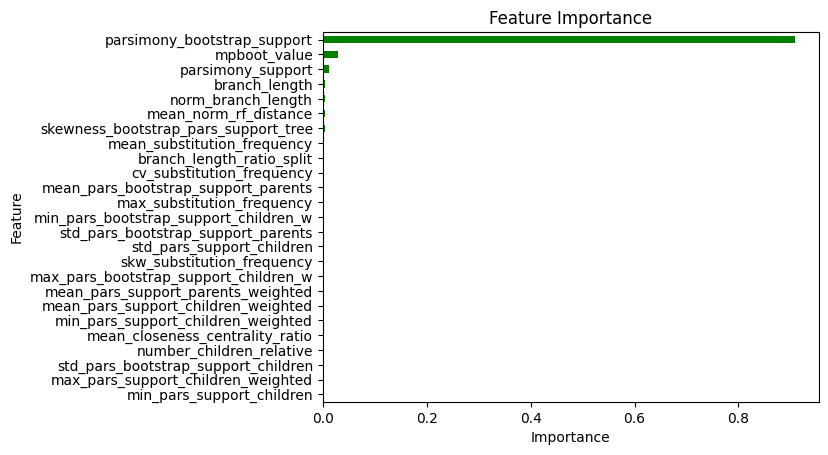

In [98]:
# X_train = X_train.drop(axis=1, columns=['dataset', 'branchId', 'group'])
global_importances = pd.Series(model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [99]:
global_importances_2 = global_importances.copy()

In [100]:
global_importances

min_pars_support_children                0.001063
max_pars_support_children_weighted       0.001129
std_pars_bootstrap_support_children      0.001132
number_children_relative                 0.001167
mean_closeness_centrality_ratio          0.001225
min_pars_support_children_weighted       0.001259
mean_pars_support_children_weighted      0.001346
mean_pars_support_parents_weighted       0.001362
max_pars_bootstrap_support_children_w    0.001395
skw_substitution_frequency               0.001449
std_pars_support_children                0.001530
std_pars_bootstrap_support_parents       0.001557
min_pars_bootstrap_support_children_w    0.002397
max_substitution_frequency               0.002408
mean_pars_bootstrap_support_parents      0.002506
cv_substitution_frequency                0.002512
branch_length_ratio_split                0.003231
mean_substitution_frequency              0.003242
skewness_bootstrap_pars_support_tree     0.003536
mean_norm_rf_distance                    0.004531


In [101]:
important_features_dict = {}
for idx, val in enumerate(model.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list}')

5 most important features: [12, 24, 2, 6, 7, 19, 15, 21, 0, 22, 13, 20, 16, 14, 9, 23, 17, 5, 11, 3, 1, 10, 18, 4, 8]


In [102]:
global_importances_2.sort_values(ascending=False, inplace=True)

In [103]:
global_importances_2.columns

AttributeError: 'Series' object has no attribute 'columns'

In [104]:
global_importances_2_df = pd.DataFrame({'feature':global_importances_2.index, 'importance':global_importances_2.values})


In [105]:
global_importances_2_df

,feature,importance
0,parsimony_bootstrap_support,0.909104
1,mpboot_value,0.029364
2,parsimony_support,0.011649
3,branch_length,0.005064
4,norm_branch_length,0.004843
5,mean_norm_rf_distance,0.004531
6,skewness_bootstrap_pars_support_tree,0.003536
7,mean_substitution_frequency,0.003242
8,branch_length_ratio_split,0.003231
9,cv_substitution_frequency,0.002512


In [107]:
global_importances_2_df.to_csv('/home/piyumal/PHD/phylogenetics/bootstrap_support/'+'feature_imporance_v2.csv', index=False)